In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm

from scipy.stats import shapiro

In [153]:
veri_seti = pd.read_excel('HW_Data_Set.xlsx')
df = veri_seti.copy()

In [154]:
df.head(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [155]:
df['ind_420'] = pd.to_numeric(df['ind_420'], errors='coerce')
df['ind_422'] = pd.to_numeric(df['ind_422'], errors='coerce')

In [156]:
df["ind_422"].fillna(df["ind_422"].median(), inplace=True)
df["ind_420"].fillna(df["ind_420"].median(), inplace=True)

In [157]:
df_dummies = pd.get_dummies(df)

In [158]:
X = df_dummies.drop(["20_target","50_target","90_target"], axis = 1)
y = df_dummies["50_target"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [174]:
pca = PCA(n_components=10)

In [175]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [176]:
X_reduced_train[0:1,:]

array([[-5.87519791,  2.1200352 ,  0.76472715, -1.38206528, -2.37568304,
        -0.79587704, -0.77203453,  0.47326875,  1.65633009,  0.42109374]])

In [177]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)

array([36.01, 48.72, 54.76, 59.34, 62.6 , 65.55, 68.26, 70.37, 72.3 ,
       73.91])

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm = LinearRegression()

In [180]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [181]:
y_pred = pcr_model.predict(X_reduced_test)

In [182]:
pcr_model.intercept_

-3.133597255351713

In [183]:
pcr_model.coef_

array([-0.24696371,  0.37827847,  0.79255716,  1.1765228 , -1.12236198,
       -0.40186523,  0.41073398,  0.36960798, -0.85320284, -1.41407544])

In [184]:
ols_model = sm.OLS(y_train, X_reduced_train)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:              50_target   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.024
Method:                 Least Squares   F-statistic:                              13.25
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    3.16e-23
Time:                        16:47:56   Log-Likelihood:                         -24427.
No. Observations:                4933   AIC:                                  4.887e+04
Df Residuals:                    4923   BIC:                                  4.894e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [185]:
h = pd.DataFrame(X_reduced_train)

In [186]:
h

,0,1,2,3,4,5,6,7,8,9
0,-5.875198,2.120035,0.764727,-1.382065,-2.375683,-0.795877,-0.772035,0.473269,1.656330,0.421094
1,1.798521,0.428656,-1.948088,-3.539169,0.090476,0.539538,0.721358,0.030516,-0.286882,0.409644
2,1.237580,-4.089656,0.436131,-1.419806,1.687714,-0.929388,-0.787501,0.837756,0.377858,-1.219411
3,-1.693621,-0.379817,-3.150195,-2.514710,1.115984,-0.824596,0.616299,0.501115,0.614425,0.616934
4,-3.938794,6.622288,0.359497,-1.642777,0.120389,-1.444846,0.179176,-0.240171,0.771673,0.236218
...,...,...,...,...,...,...,...,...,...,...
4928,-6.496998,4.274665,0.779084,1.123460,-1.252386,-0.008658,2.324180,-0.828990,0.042057,0.540070
4929,-0.904891,7.052396,1.316040,-4.503613,0.289943,-0.004298,-1.187593,-1.638716,0.395623,-1.897231
4930,-6.894614,-3.407619,1.663804,-2.198791,0.154412,-2.157238,-1.803816,0.760121,1.478579,0.638922
4931,1.095753,0.210538,-5.056835,0.395941,1.936080,-0.469435,1.150887,0.544780,-1.125014,1.205283


In [187]:
k = h.drop(7, axis = 1)
u= k.to_numpy()

In [188]:
ols_model = sm.OLS(y_train, u)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:              50_target   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.024
Method:                 Least Squares   F-statistic:                              14.55
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    1.64e-23
Time:                        16:47:56   Log-Likelihood:                         -24428.
No. Observations:                4933   AIC:                                  4.887e+04
Df Residuals:                    4924   BIC:                                  4.893e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [189]:
k = h.drop(6, axis = 1)


In [190]:
k

,0,1,2,3,4,5,7,8,9
0,-5.875198,2.120035,0.764727,-1.382065,-2.375683,-0.795877,0.473269,1.656330,0.421094
1,1.798521,0.428656,-1.948088,-3.539169,0.090476,0.539538,0.030516,-0.286882,0.409644
2,1.237580,-4.089656,0.436131,-1.419806,1.687714,-0.929388,0.837756,0.377858,-1.219411
3,-1.693621,-0.379817,-3.150195,-2.514710,1.115984,-0.824596,0.501115,0.614425,0.616934
4,-3.938794,6.622288,0.359497,-1.642777,0.120389,-1.444846,-0.240171,0.771673,0.236218
...,...,...,...,...,...,...,...,...,...
4928,-6.496998,4.274665,0.779084,1.123460,-1.252386,-0.008658,-0.828990,0.042057,0.540070
4929,-0.904891,7.052396,1.316040,-4.503613,0.289943,-0.004298,-1.638716,0.395623,-1.897231
4930,-6.894614,-3.407619,1.663804,-2.198791,0.154412,-2.157238,0.760121,1.478579,0.638922
4931,1.095753,0.210538,-5.056835,0.395941,1.936080,-0.469435,0.544780,-1.125014,1.205283


In [191]:
o = k.drop(7 , axis = 1)
p = o.drop(5 , axis = 1)
g = p.drop(8 , axis = 1)
u= g.to_numpy()

In [192]:
g

,0,1,2,3,4,9
0,-5.875198,2.120035,0.764727,-1.382065,-2.375683,0.421094
1,1.798521,0.428656,-1.948088,-3.539169,0.090476,0.409644
2,1.237580,-4.089656,0.436131,-1.419806,1.687714,-1.219411
3,-1.693621,-0.379817,-3.150195,-2.514710,1.115984,0.616934
4,-3.938794,6.622288,0.359497,-1.642777,0.120389,0.236218
...,...,...,...,...,...,...
4928,-6.496998,4.274665,0.779084,1.123460,-1.252386,0.540070
4929,-0.904891,7.052396,1.316040,-4.503613,0.289943,-1.897231
4930,-6.894614,-3.407619,1.663804,-2.198791,0.154412,0.638922
4931,1.095753,0.210538,-5.056835,0.395941,1.936080,1.205283


In [193]:
ols_model = sm.OLS(y_train, u)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:              50_target   R-squared (uncentered):                   0.023
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              19.66
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    8.44e-23
Time:                        16:47:56   Log-Likelihood:                         -24435.
No. Observations:                4933   AIC:                                  4.888e+04
Df Residuals:                    4927   BIC:                                  4.892e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

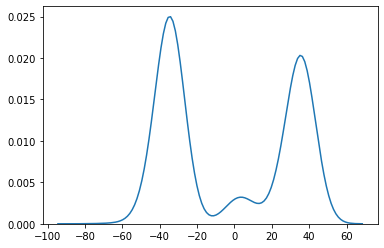

In [194]:
sns.kdeplot(ols_results.resid)

In [195]:
stat, p = shapiro(ols_results.resid)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Residüler Dağılım normalden geliyor (H0 reddedilemez)')
else:
    print('Residüler Normal dağılımdan gelmiyor (H0 reddedilir)')

Statistics=0.794, p=0.000
Residüler Normal dağılımdan gelmiyor (H0 reddedilir)


In [196]:
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
score_c = r2_score(y_, y_pred)
score_cv = r2_score(y, y_pred)


NameError: name 'y_' is not defined

In [ ]:
yhat = pcr_model.predict(X_reduced_test)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print (r_squared, adjusted_r_squared)